In [7]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

Привести к шаблону на плоскости

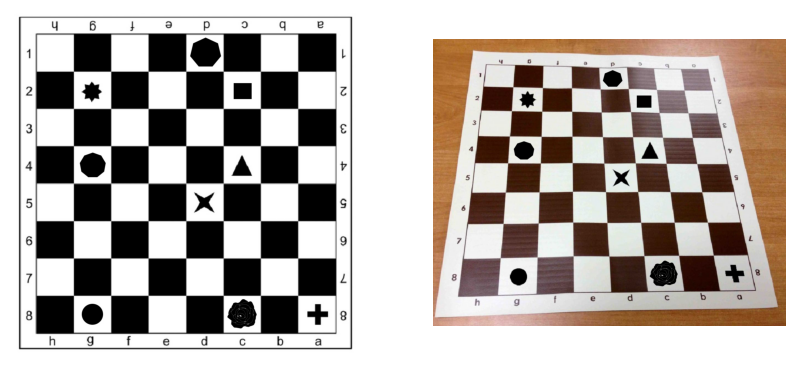

In [8]:
scanImgBGR = cv2.imread('/mnt/d/chess/chess_photo.jpg')
scanImgRGB = cv2.cvtColor(scanImgBGR, cv2.COLOR_BGR2RGB)

templateImgBGR = cv2.imread('/mnt/d/chess/chess_pattern.jpg')
templateImgRGB = cv2.cvtColor(templateImgBGR, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(templateImgRGB)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(scanImgRGB)
plt.axis('off')

plt.show()

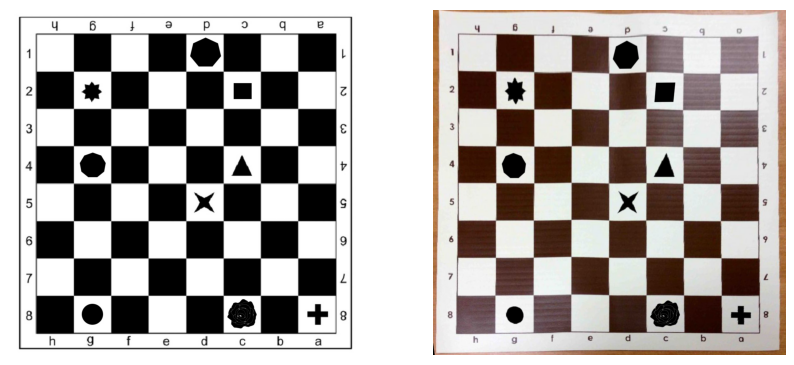

In [9]:
sift = cv2.SIFT_create()

keypoints1, descriptors1 = sift.detectAndCompute(scanImgRGB, None)
keypoints2, descriptors2 = sift.detectAndCompute(templateImgRGB, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bf.match(descriptors1, descriptors2)

matches = sorted(matches, key=lambda x: x.distance)

num_matches_to_keep = int(len(matches) * 0.7)
matches_filtered = matches[:num_matches_to_keep]

src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches_filtered]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches_filtered]).reshape(-1, 1, 2)

H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC)

height, width, channels = templateImgRGB.shape
warped_image = cv2.warpPerspective(scanImgRGB, H, (width, height))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(templateImgRGB)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(warped_image)
plt.axis('off')

plt.show()

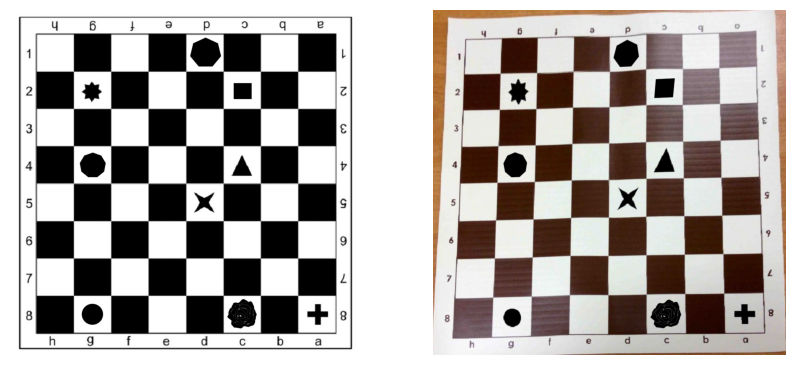

In [10]:
scanImgBGR = cv2.imread('/mnt/d/chess/chess_photo.jpg')
scanImgRGB = cv2.cvtColor(scanImgBGR, cv2.COLOR_BGR2RGB)

templateImgBGR = cv2.imread('/mnt/d/chess/chess_pattern.jpg')
templateImgRGB = cv2.cvtColor(templateImgBGR, cv2.COLOR_BGR2RGB)

orb = cv2.ORB_create(nfeatures=10000)

keypoints1, descriptors1 = orb.detectAndCompute(scanImgRGB, None)
keypoints2, descriptors2 = orb.detectAndCompute(templateImgRGB, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(descriptors1, descriptors2)

matches = sorted(matches, key=lambda x: x.distance)

num_matches_to_keep = int(len(matches) * 0.4)
matches_filtered = matches[:num_matches_to_keep]

src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches_filtered]).reshape(-1, 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches_filtered]).reshape(-1, 1, 2)

H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC)

height, width, channels = templateImgRGB.shape
warped_image = cv2.warpPerspective(scanImgRGB, H, (width, height))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(templateImgRGB)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(warped_image)
plt.axis('off')

plt.show()

Посчитать количество клеток

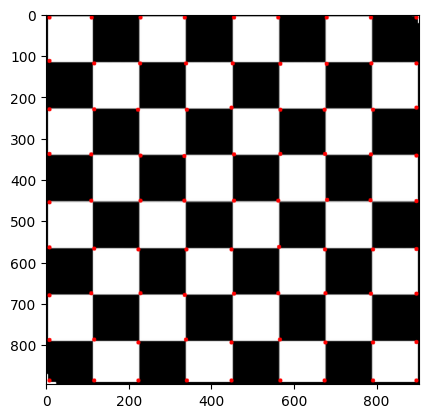

In [11]:
scanImgBGR = cv2.imread('/mnt/d/chess/chess.jpg')
imgGray = cv2.cvtColor(scanImgBGR, cv2.COLOR_BGR2GRAY)

points = 0
corners = cv2.goodFeaturesToTrack(imgGray, maxCorners = 500, qualityLevel = 0.1, minDistance = 15, blockSize = 9)
imgCopy = scanImgBGR.copy()

if corners is not None :
    for x, y in np.float32(corners).reshape(-1, 2):
        cv2.circle(imgCopy, (int(x), int(y)), 5, (0, 0, 255), -1)
        points = points + 1
        
plt.imshow(imgCopy[:,:,::-1])

In [12]:
cells = int(math.sqrt(points) - 1)
all_cells = cells ** 2
print(cells, all_cells)

8 64
